# Dimension Reduction

Content:

1. draw digits
2. pca before and after, draw digits
3. t-sne
4. 2-d pca
5. PCA evaluation

### Step 1: Download dataset


In [30]:
import tensorflow as tf
import numpy as np

(xs_train, ys_train), (xs_test, ys_test) = tf.keras.datasets.mnist.load_data()

# We'll only be using the test set.
xs = xs_test.reshape((xs_test.shape[0], -1))
ys = ys_test

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")

xs shape: (10000, 784)
ys shape: (10000,)


### Step 2: Visualize digits


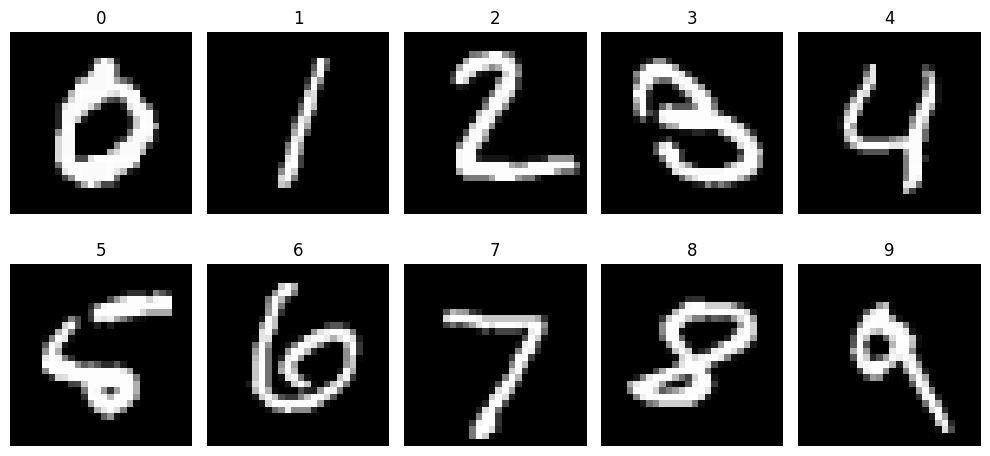

In [31]:
# Your code here.
import matplotlib.pyplot as plt

samples = {}

for i in range(len(ys)):
    digit = ys[i]
    if digit not in samples:
        samples[digit] = xs[i]
    if len(samples) == 10:
        break

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for digit, ax in zip(range(10), axes):
    ax.imshow(samples[digit].reshape(28, 28), cmap='gray')
    ax.set_title(f"{digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### Step 3: PCA projection and recovery


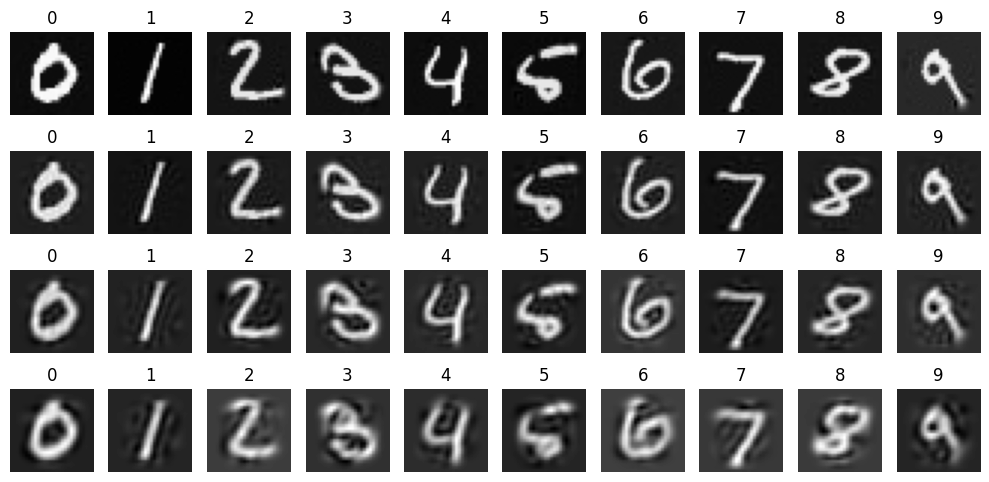

In [32]:
from sklearn.decomposition import PCA

pca_dimensions = [400, 200, 100, 50]
reprojected_digits = {}

for dim in pca_dimensions:
    pca = PCA(n_components=dim)
    pca.fit(xs)
    reprojected_digits[dim] = pca.inverse_transform(pca.transform(np.array([samples[digit] for digit in range(10)])))

fig, axes = plt.subplots(len(pca_dimensions), 10, figsize=(10, 5))

for i, dim in enumerate(pca_dimensions):
    for digit in range(10):
        ax = axes[i, digit]
        ax.imshow(reprojected_digits[dim][digit].reshape(28, 28), cmap='gray')
        if digit == 0:
            ax.set_ylabel(f'PCA {dim}', rotation=0, labelpad=40, size='large')
        ax.set_title(f"{digit}")
        ax.axis('off')

plt.tight_layout()
plt.show()

### Step 4: t-SNE visualization



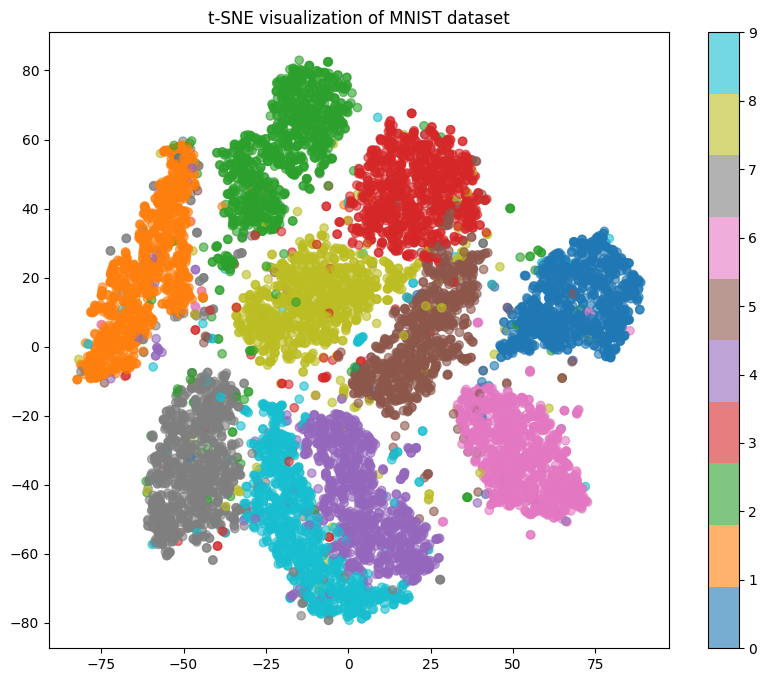

In [33]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
xs_reduced = tsne.fit_transform(xs)

df = pd.DataFrame(xs_reduced, columns=['Dim1', 'Dim2'])
df['Label'] = ys

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Dim1'], df['Dim2'], c=df['Label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE visualization of MNIST dataset')

plt.show()

### Step 5: PCA visualization



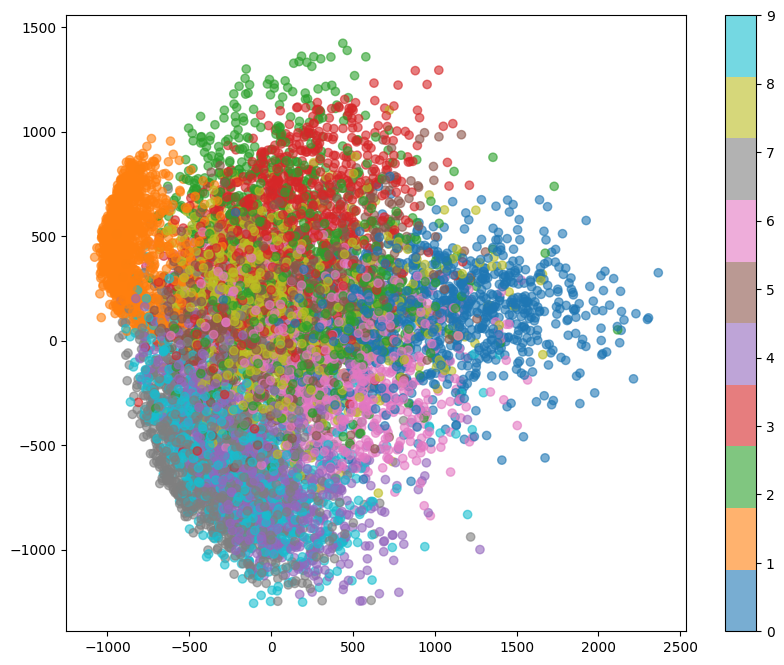

In [34]:
# Your code here.
xs_reduced = xs.reshape((xs.shape[0], -1))

pca = PCA(n_components=2)
xs_reduced = pca.fit_transform(xs_reduced)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(xs_reduced[:, 0], xs_reduced[:, 1], c=ys, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.show()

### Step 6: PCA evaluation



#### Answer

1. A suitable metric to evaluate PCA performance is the explained variance ratio. This ratio indicates the proportion of the dataset's variance that lies along each principal component. Using this value, we can determine how well the reduced-dimensional representation retains the original data's variability.

In [35]:
# Your code here.
from statistics import mean
pca_dimensions = [400, 200, 100, 50, 2]

explained_variance_ratios = {}
for dim in pca_dimensions:
    pca = PCA(n_components=dim)
    pca.fit(xs)
    explained_variance_ratios[dim] = (mean(pca.explained_variance_ratio_))

for dim in pca_dimensions:
    print(f"Explained variance ratio for PCA {dim}: {explained_variance_ratios[dim]}")

Explained variance ratio for PCA 400: 0.0024908685955703706
Explained variance ratio for PCA 200: 0.00484133538432449
Explained variance ratio for PCA 100: 0.009183553920667503
Explained variance ratio for PCA 50: 0.01663258758754029
Explained variance ratio for PCA 2: 0.08796074972339343
